In [89]:
import csv, math, os

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

In [91]:
best_results_path = "../data/jss/imrg/ds1/best/testbed1_small.csv"

In [92]:
def read_csv_results(file_path):
    best_results = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)
        for row in csv_reader:
            best_results.append({'filename': row[0], 'cost': row[1]})

    return best_results

best = read_csv_results(best_results_path)

best[0]

{'filename': 't1s_0001', 'cost': '663'}

In [93]:
def compute_metrics(results, best):
    total_difference = 0
    total_squared_difference = 0

    for i in range(len(results)):
        cost = float(results[i]['cost'])
        best_cost = float(best[i]['cost'])
        cost_difference = cost - best_cost
        relative_difference = (cost_difference / best_cost) * 100
        total_difference += abs(cost_difference)
        total_squared_difference += cost_difference ** 2
        # print(f"Filename: {results[i]['filename']}, Absolute Difference: {cost_difference}, Relative Difference: {relative_difference:.2f}%")

    mae = total_difference / len(results)
    rmse = math.sqrt(total_squared_difference / len(results))

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    return mae, rmse

In [94]:
results_folders = ['epoch100', 'epoch200', 'epoch500', 'epoch1000',
    'epoch1400', 'epoch6900', 'epoch13800', 'epoch27500', 'epoch41500']

In [95]:
def compute_results(main_path):
    for folder in results_folders:
        base_path = os.path.join(main_path, folder)
        meal_path = os.path.join(base_path, "meal.csv")
        mhac_path = os.path.join(base_path, "mhac.csv")

        print(f"\nComputing metrics for {folder}")
        if not os.path.exists(mhac_path):
            print(f"File {mhac_path} does not exist")
            continue
        if not os.path.exists(meal_path):
            print(f"File {meal_path} does not exist")
            continue

        meal = read_csv_results(meal_path)
        mhac = read_csv_results(mhac_path)

        print("Mhac")
        compute_metrics(mhac, best)
        print("Meal")
        compute_metrics(meal, best)

print("SA")
compute_results("results/SA/")
print("\n\nGA")
compute_results("results/GA/")
print("\n\nACO")
compute_results("results/ACO/")

SA

Computing metrics for epoch100
File results/SA/epoch100/mhac.csv does not exist

Computing metrics for epoch200
File results/SA/epoch200/mhac.csv does not exist

Computing metrics for epoch500
File results/SA/epoch500/mhac.csv does not exist

Computing metrics for epoch1000
File results/SA/epoch1000/mhac.csv does not exist

Computing metrics for epoch1400
Mhac
Mean Absolute Error (MAE): 3103.9416666666666
Root Mean Squared Error (RMSE): 4522.723944151357
Meal
Mean Absolute Error (MAE): 4227.105555555556
Root Mean Squared Error (RMSE): 5857.466927397503

Computing metrics for epoch6900
Mhac
Mean Absolute Error (MAE): 3079.1694444444443
Root Mean Squared Error (RMSE): 4486.23204030336
Meal
Mean Absolute Error (MAE): 4089.5
Root Mean Squared Error (RMSE): 5728.907756089094

Computing metrics for epoch13800
Mhac
Mean Absolute Error (MAE): 3071.616666666667
Root Mean Squared Error (RMSE): 4474.151884870348
Meal
Mean Absolute Error (MAE): 4085.825
Root Mean Squared Error (RMSE): 5712.995

In [96]:
cpp_results = {
    "SA": {
        "epoch1400": {
            "time": 11,
            "mae": 3103,
            "rmse": 4522

        },
        "epoch6900": {
            "time": 53,
            "mae": 3079,
            "rmse": 4486
        },
        "epoch13800": {
            "time": 139,
            "mae": 3071,
            "rmse": 4474
        },
        "epoch27500": {
            "time": 239,
            "mae": 3072,
            "rmse": 4475
        },
        "epoch41500": {
            "time": 318,
            "mae": 3073,
            "rmse": 4477
        }
    },
    "GA": {
        "epoch100": {
            "time": 32,
            "mae": 3102,
            "rmse": 4514
        },
        "epoch200": {
            "time": 57,
            "mae": 3099,
            "rmse": 4515
        },
        "epoch500": {
            "time": 152,
            "mae": 3094,
            "rmse": 4507
        },
        "epoch1000": {
            "time": 229,
            "mae": 3095,
            "rmse": 4505
        },
        "epoch1400": {
            "time": 445,
            "mae": 3091,
            "rmse": 4504
        },
        "epoch6900": {
            "time": 1900
        },
        "epoch13800": {
            "time": 3755
        }
    },
    "ACO": {
        "epoch100": {
            "time": 37,
            "mae": 3445,
            "rmse": 4859
        },
        "epoch200": {
            "time": 76,
            "mae": 3443,
            "rmse": 4840
        },
        "epoch500": {
            "time": 163,
            "mae": 3405,
            "rmse": 4802
        },
        "epoch1000": {
            "time": 320,
            "mae": 3392,
            "rmse": 4783
        },
        "epoch1400": {
            "time": 424,
        },
        "epoch6900": {
            "time": 2055
        },
        "epoch13800": {
            "time": 3939
        }
    }
}

In [97]:
cpp_python_results = {
    "SA": {
        "epoch1400": {
            "time": 90,
        },
        "epoch6900": {
            "time": 500,
        },
        "epoch13800": {
            "time": 876,
        },
        "epoch27500": {
            "time": 1751,
        },
        "epoch41500": {
            "time": 2725,
        }
    },
    "GA": {
        "epoch100": {
            "time": 35,
        },
        "epoch200": {
            "time": 69,
        },
        "epoch500": {
            "time": 170,
        },
        "epoch1000": {
            "time": 283,
        },
        "epoch1400": {
            "time": 388,
        },
        "epoch6900": {
            "time": 2275,
        },
        "epoch13800": {
            "time": 4594,
        }
    },
    "ACO": {
        "epoch100": {
            "time": 31,
        },
        "epoch200": {
            "time": 63,
        },
        "epoch500": {
            "time": 157,
        },
        "epoch1000": {
            "time": 316,
        },
        "epoch1400": {
            "time": 512,
        },
        "epoch6900": {
            "time": 2062,
        },
        "epoch13800": {
            "time": 4163,
        }
    }
}

In [98]:
meal_results = {
    "SA": {
        "epoch1400": {
            "time": 132,
            "mae": 4227,
            "rmse": 5857

        },
        "epoch6900": {
            "time": 748,
            "mae": 4089,
            "rmse": 5728
        },
        "epoch13800": {
            "time": 1519,
            "mae": 4085,
            "rmse": 5712
        },
        "epoch27500": {
            "time": 3165,
            "mae": 4061,
            "rmse": 5679
        },
        "epoch41500": {
            "time": 4783,
            "mae": 4056,
            "rmse": 5702
        }
    },
    "GA": {
        "epoch100": {
            "time": 614,
            "mae": 3863,
            "rmse": 5457
        },
        "epoch200": {
            "time": 975,
            "mae": 3852,
            "rmse": 5428
        },
        "epoch500": {
            "time": 1851,
            "mae": 3813,
            "rmse": 5396
        },
        "epoch1000": {
            "time": 3753,
            "mae": 3798,
            "rmse": 5376
        },
        "epoch1400": {
            "time": 5074,
            "mae": 3789,
            "rmse": 5370
        },
        # "epoch6900": 0,
        # "epoch13800": 0
    },
    "ACO": {
        "epoch100": {
            "time": 675,
            "mae": 3855,
            "rmse": 5441
        },
        "epoch200": {
            "time": 1534,
            "mae": 3844,
            "rmse": 5425
        },
        "epoch500": {
            "time": 3410,
            "mae": 3846,
            "rmse": 5428
        },
        "epoch1000": {
            "time": 6499,
            "mae": 3837,
            "rmse": 5417
        },
        "epoch1400": {
            "time": 8231,
            "mae": 3833,
            "rmse": 5411
        },
        # "epoch6900": 0,
        # "epoch13800": 0
    }
}

In [118]:
def plot_algorithm_times_improved(algo_name):
    # Extract unique epochs across all datasets
    all_epochs = set(cpp_results[algo_name].keys()) | set(cpp_python_results[algo_name].keys()) | set(meal_results[algo_name].keys())
    sorted_epochs = sorted(all_epochs, key=lambda x: int(x.replace('epoch', '')))

    # Get times for each dataset
    cpp_times = [cpp_results[algo_name].get(epoch, {}).get('time') for epoch in sorted_epochs]
    cpp_py_times = [cpp_python_results[algo_name].get(epoch, {}).get('time') for epoch in sorted_epochs]
    meal_times = [meal_results[algo_name].get(epoch, {}).get('time') for epoch in sorted_epochs]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot([int(epoch.replace('epoch', '')) for epoch in sorted_epochs], cpp_times, label='mhac', marker='o')
    plt.plot([int(epoch.replace('epoch', '')) for epoch in sorted_epochs], cpp_py_times, label='mhac + Python', marker='o')
    plt.plot([int(epoch.replace('epoch', '')) for epoch in sorted_epochs], meal_times, label='meal (Python)', marker='o')
    plt.title(f'Execution Time Comparison for {algo_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

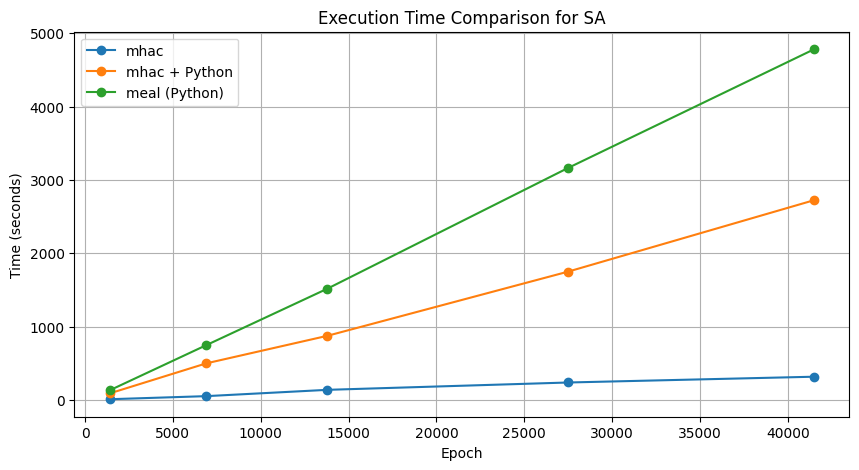

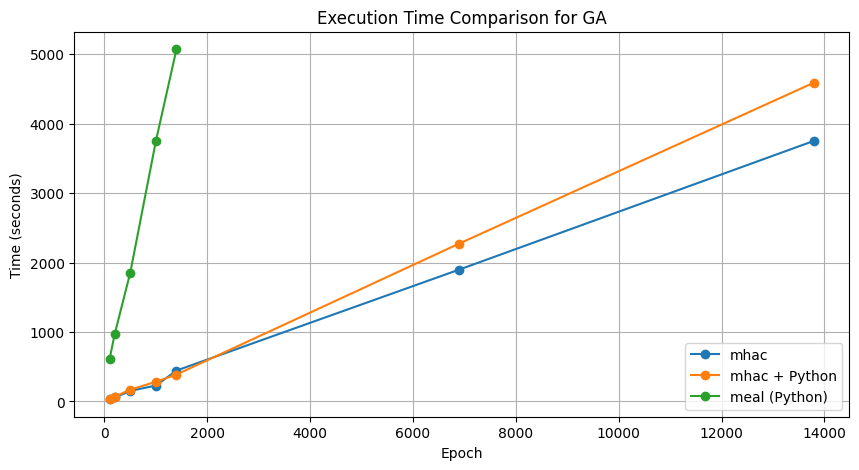

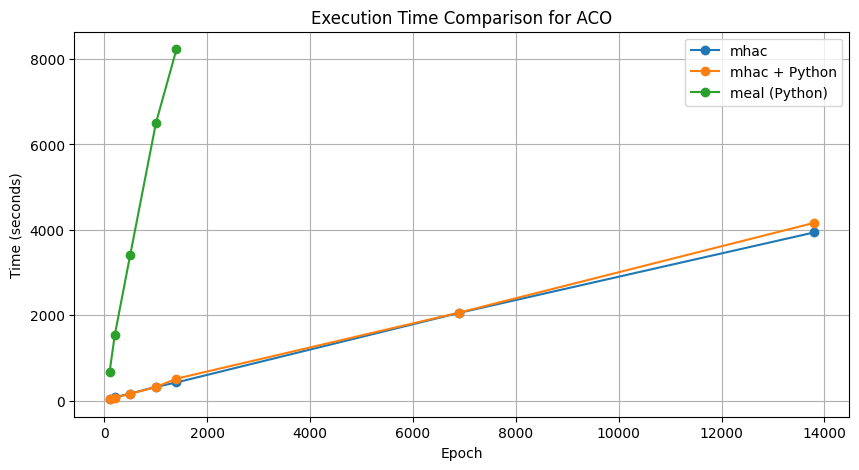

In [119]:
# Plotting for each algorithm
for algo in ['SA', 'GA', 'ACO']:
    plot_algorithm_times_improved(algo)

In [108]:
# Function to plot MAE or RMSE for a given algorithm
def plot_metric_comparison(algo_name, metric):
    # Ensure both datasets have the metric for the epoch
    common_epochs = set(cpp_results[algo_name].keys()) & set(meal_results[algo_name].keys())
    epochs = sorted(common_epochs, key=lambda x: int(x.replace('epoch', '')))
    
    # Filtering epochs to those having the metric in both datasets
    filtered_epochs = [epoch for epoch in epochs if metric in cpp_results[algo_name][epoch] and metric in meal_results[algo_name][epoch]]

    # Collecting metric values
    cpp_metric = [cpp_results[algo_name][epoch][metric] for epoch in filtered_epochs]
    meal_metric = [meal_results[algo_name][epoch][metric] for epoch in filtered_epochs]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot([int(epoch.replace('epoch', '')) for epoch in filtered_epochs], cpp_metric, label='mhac', marker='o')
    plt.plot([int(epoch.replace('epoch', '')) for epoch in filtered_epochs], meal_metric, label='meal', marker='o')
    plt.title(f'{metric} Comparison for {algo_name}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

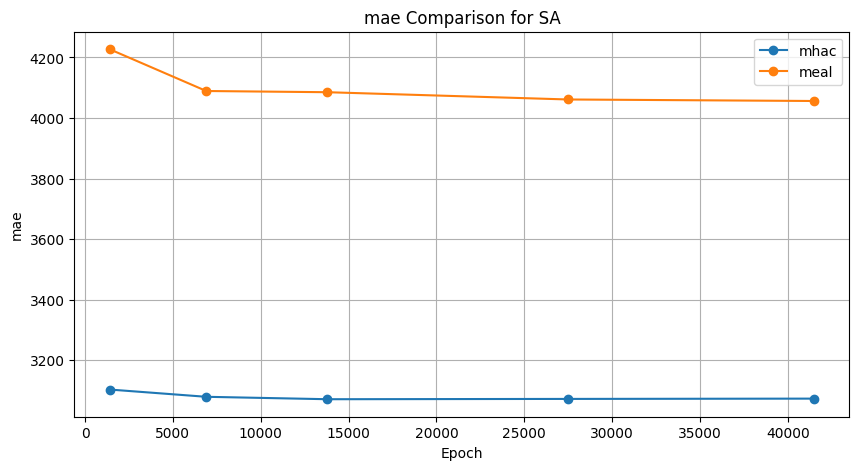

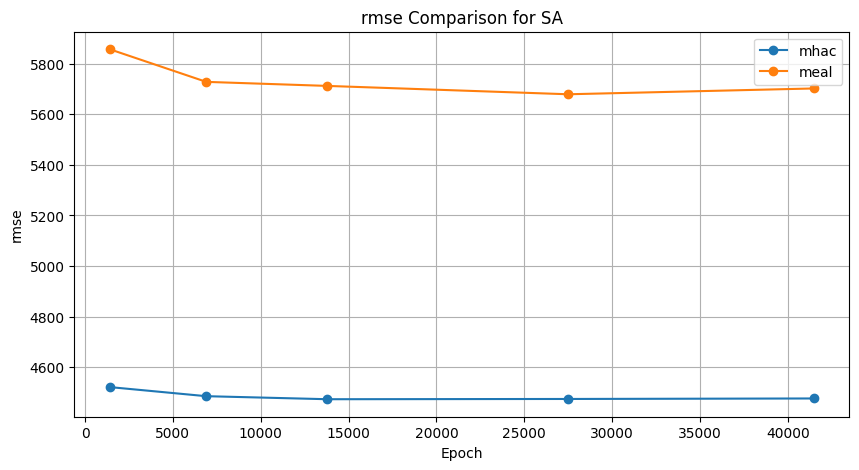

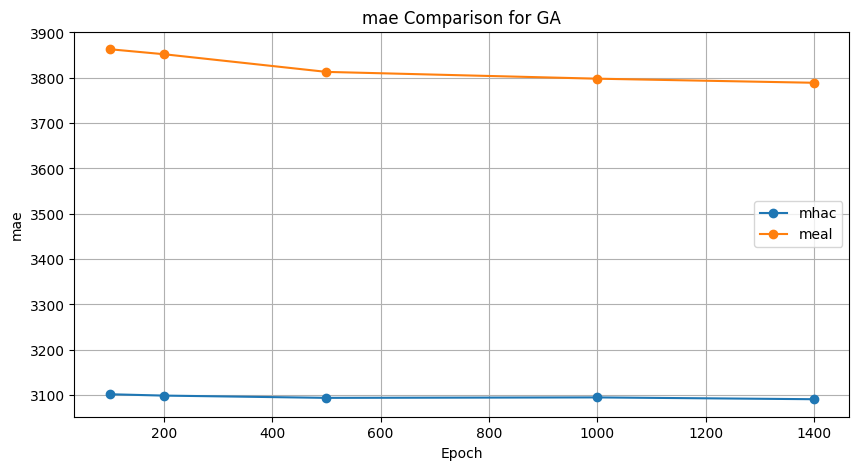

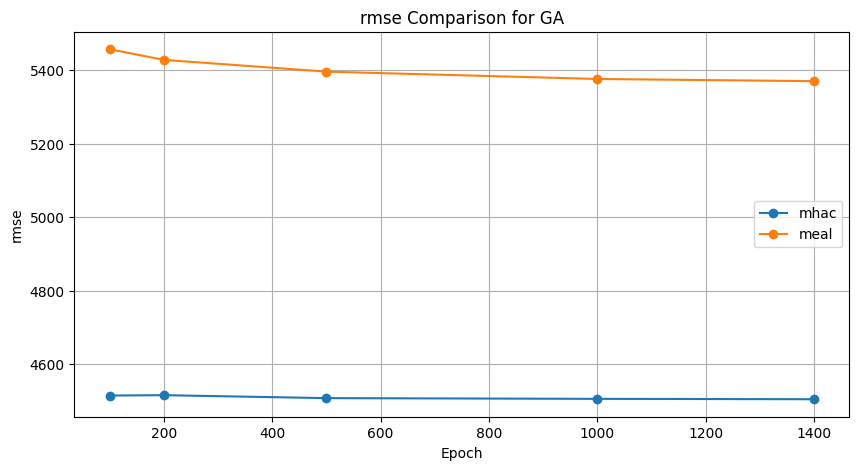

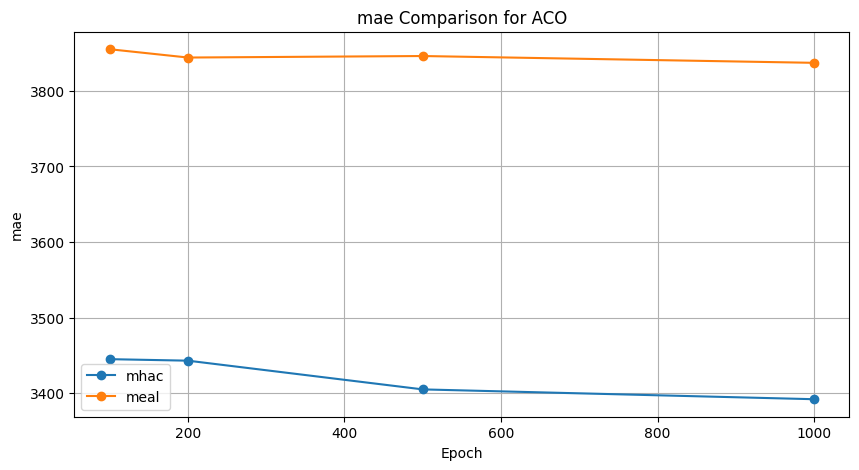

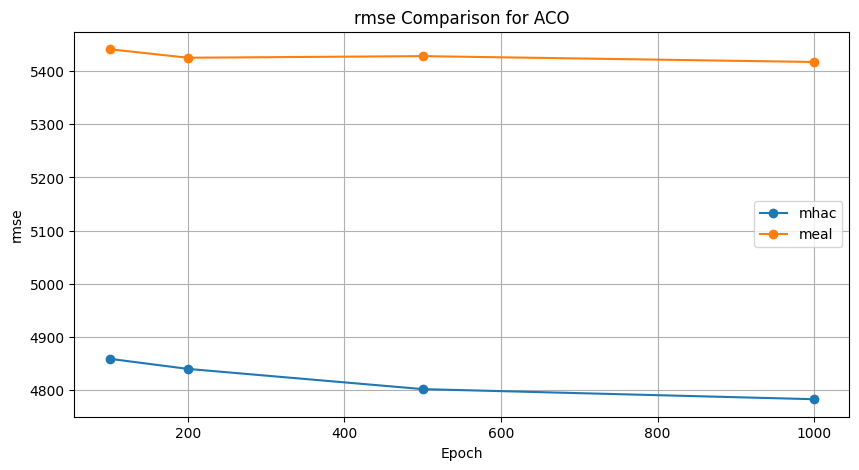

In [120]:
# Plotting for each algorithm
for algo in ['SA', 'GA', 'ACO']:
    for metric_to_plot in ['mae', 'rmse']:
        plot_metric_comparison(algo, metric_to_plot)

In [116]:
# Function to plot a specified metric (either RMSE or MAE) against time with a logarithmic x-axis
def plot_metric_vs_time_log_scale(metric):
    plt.figure(figsize=(12, 7))
    colors = ['b', 'g', 'r']  # Colors for SA, GA, ACO respectively
    markers = ['o', '^', 's']  # Different markers for each algorithm

    for i, algo_name in enumerate(['SA', 'GA', 'ACO']):
        # Collecting data
        cpp_times = []
        cpp_metrics = []
        meal_times = []
        meal_metrics = []

        # Collect data for C++
        for epoch, data in cpp_results[algo_name].items():
            if metric in data and 'time' in data:
                cpp_times.append(data['time'])
                cpp_metrics.append(data[metric])

        # Collect data for mealpy
        for epoch, data in meal_results[algo_name].items():
            if metric in data and 'time' in data:
                meal_times.append(data['time'])
                meal_metrics.append(data[metric])

        # Plotting using a semilogx scale for the time
        if cpp_metrics and cpp_times:  # Check if data is not empty
            plt.semilogx(cpp_times, cpp_metrics, label=f'mhac {algo_name}', marker=markers[i], color=colors[i], linestyle='-')
        if meal_metrics and meal_times:
            plt.semilogx(meal_times, meal_metrics, label=f'meal {algo_name}', marker=markers[i], color=colors[i], linestyle='--')

    plt.title(f'{metric.upper()} vs Time (Log Scale) Across Algorithms')
    plt.xlabel('Time (seconds, log scale)')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

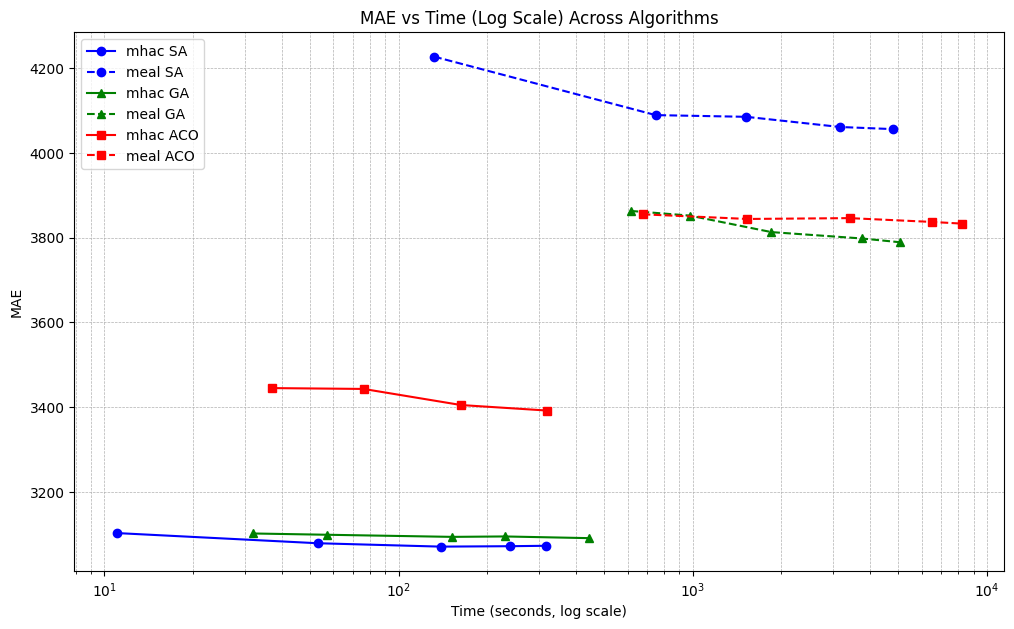

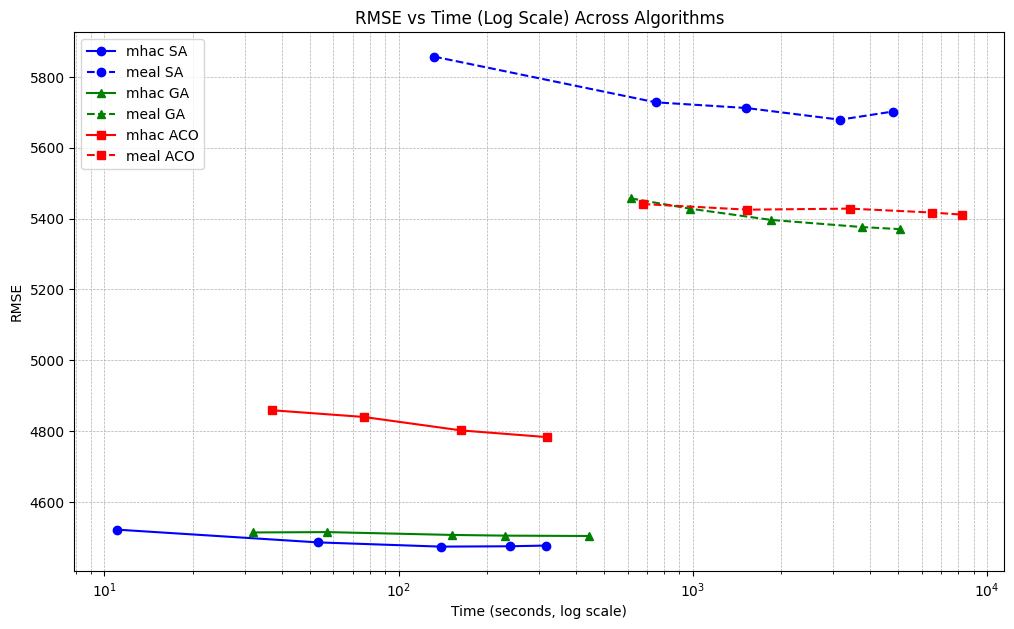

In [117]:
for metric in ['mae', 'rmse']:
    plot_metric_vs_time_log_scale(metric)

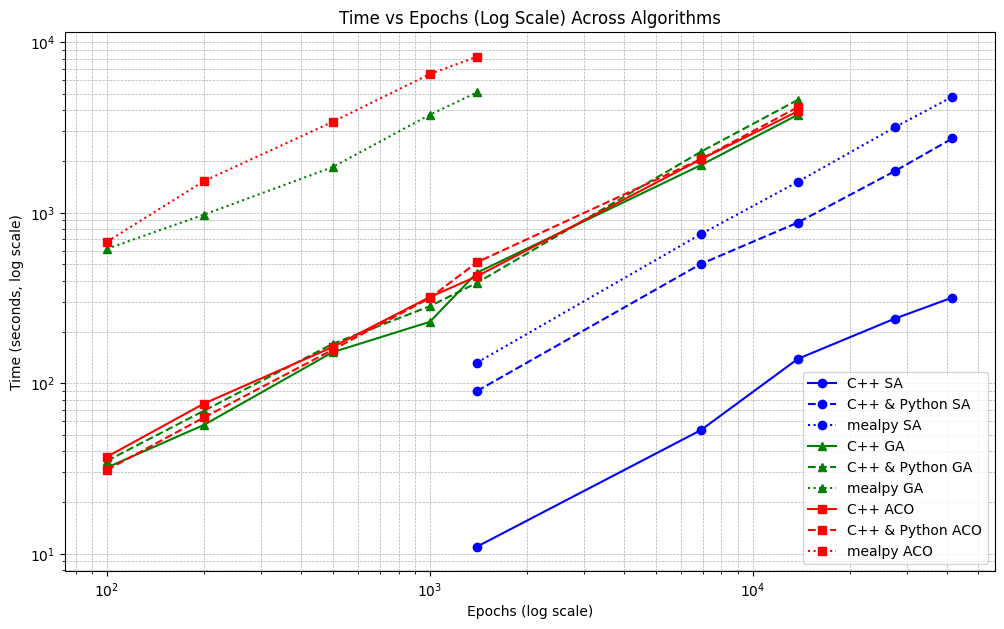

In [121]:
# Function to plot Time against Epochs using logarithmic scale for both axes
def plot_time_vs_epochs_log_scale():
    plt.figure(figsize=(12, 7))
    colors = ['b', 'g', 'r']  # Colors for SA, GA, ACO respectively
    markers = ['o', '^', 's']  # Different markers for each algorithm
    line_styles = ['-', '--', ':']  # Line styles for each dataset

    for i, algo_name in enumerate(['SA', 'GA', 'ACO']):
        # Collecting data for C++
        cpp_epochs = [int(epoch.replace('epoch', '')) for epoch in cpp_results[algo_name] if 'time' in cpp_results[algo_name][epoch]]
        cpp_times = [cpp_results[algo_name][epoch]['time'] for epoch in cpp_results[algo_name] if 'time' in cpp_results[algo_name][epoch]]

        # Collecting data for C++ with Python
        cpp_py_epochs = [int(epoch.replace('epoch', '')) for epoch in cpp_python_results[algo_name] if 'time' in cpp_python_results[algo_name][epoch]]
        cpp_py_times = [cpp_python_results[algo_name][epoch]['time'] for epoch in cpp_python_results[algo_name] if 'time' in cpp_python_results[algo_name][epoch]]

        # Collecting data for mealpy
        meal_epochs = [int(epoch.replace('epoch', '')) for epoch in meal_results[algo_name] if 'time' in meal_results[algo_name][epoch]]
        meal_times = [meal_results[algo_name][epoch]['time'] for epoch in meal_results[algo_name] if 'time' in meal_results[algo_name][epoch]]

        # Plotting using a loglog scale
        if cpp_times:
            plt.loglog(cpp_epochs, cpp_times, label=f'C++ {algo_name}', marker=markers[i], color=colors[i], linestyle=line_styles[0])
        if cpp_py_times:
            plt.loglog(cpp_py_epochs, cpp_py_times, label=f'C++ & Python {algo_name}', marker=markers[i], color=colors[i], linestyle=line_styles[1])
        if meal_times:
            plt.loglog(meal_epochs, meal_times, label=f'mealpy {algo_name}', marker=markers[i], color=colors[i], linestyle=line_styles[2])

    plt.title('Time vs Epochs (Log Scale) Across Algorithms')
    plt.xlabel('Epochs (log scale)')
    plt.ylabel('Time (seconds, log scale)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_time_vs_epochs_log_scale()